In [1]:
# import the required libraries

# base libraries
import os

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#statistics package
from scipy import stats
from scipy.stats import norm, skew


# Data manipulation
import numpy as np
import pandas as pd

# Data Pre-processing and transformation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from functools import reduce

# do not print warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import data
df = pd.read_csv("CW_training_final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1144 non-null   int64  
 1   MSSubClass     1144 non-null   float64
 2   MSZoning       1144 non-null   object 
 3   LotFrontage    955 non-null    float64
 4   LotArea        1144 non-null   float64
 5   Street         1144 non-null   object 
 6   Alley          66 non-null     object 
 7   LotShape       1144 non-null   object 
 8   LandContour    1144 non-null   object 
 9   Utilities      1144 non-null   object 
 10  LotConfig      1144 non-null   object 
 11  LandSlope      1144 non-null   object 
 12  Neighborhood   1144 non-null   object 
 13  Condition1     1144 non-null   object 
 14  Condition2     1144 non-null   object 
 15  BldgType       1144 non-null   object 
 16  HouseStyle     1144 non-null   object 
 17  OverallQual    1144 non-null   float64
 18  OverallC

In [4]:
#take only the important features 
df1 =df[['id','SalePrice','OverallQual','GarageCars','TotRmsAbvGrd','LotArea','LotFrontage','BedroomAbvGr',
        'TotalBsmtSF','BsmtQual','GrLivArea','Functional']]

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1144 non-null   int64  
 1   SalePrice     1144 non-null   float64
 2   OverallQual   1144 non-null   float64
 3   GarageCars    1144 non-null   float64
 4   TotRmsAbvGrd  1144 non-null   float64
 5   LotArea       1144 non-null   float64
 6   LotFrontage   955 non-null    float64
 7   BedroomAbvGr  1144 non-null   float64
 8   TotalBsmtSF   1144 non-null   float64
 9   BsmtQual      1119 non-null   object 
 10  GrLivArea     1144 non-null   float64
 11  Functional    1144 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 107.4+ KB


In [6]:
df2= df1.drop(columns ='id')
df2.describe()

,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,GrLivArea
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,955.000000,1144.000000,1144.000000,1144.000000
mean,215976.367201,6.444119,1.914241,6.943933,11313.296105,74.344503,2.937605,1156.912746,1670.102509
std,126519.228320,1.611640,0.788103,1.940154,8620.927060,28.107790,0.824537,526.948659,665.481672
min,34900.000000,1.000000,0.000000,2.000000,1300.000000,21.000000,0.000000,0.000000,334.000000
25%,135000.000000,5.000000,1.000000,6.000000,7875.000000,60.000000,2.270450,816.000000,1193.500000
50%,175700.000000,6.000000,2.000000,7.000000,9966.000000,71.000000,3.000000,1049.000000,1547.500000
75%,246933.500000,8.000000,2.000000,8.000000,12478.750000,86.000000,3.000000,1461.250000,1974.250000
max,755000.000000,10.000000,4.000000,14.000000,164660.000000,313.000000,8.000000,6110.000000,5642.000000


In [7]:
df1.isnull().sum()

id                0
SalePrice         0
OverallQual       0
GarageCars        0
TotRmsAbvGrd      0
LotArea           0
LotFrontage     189
BedroomAbvGr      0
TotalBsmtSF       0
BsmtQual         25
GrLivArea         0
Functional        0
dtype: int64

In [6]:
#transform the names to make them easier to read
df1['BsmtQual'] = df1['BsmtQual'].replace(['Ex','Gd','TA','Fa','Po','NA'],['Excellent','Good','Typical','Fair','Poor','No Basement'])
df1['Functional'] = df1['Functional'].replace(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev','Sal'],['Typical Functionality','Minor Deductions 1'
,'Minor Deductions 2','Moderate Deductions','Major Deductions 1','Major Deductions 2','Severely Damaged','Salvage only'])


In [7]:
# NAN in BsmtQual actually means no basement
df1['BsmtQual'].fillna("No Basement", inplace=True)

In [8]:
df1.head()

,id,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,BsmtQual,GrLivArea,Functional
0,1,208500.0,7.0,2.0,8.0,8450.0,65.0,3.0,856.0,Good,1710.0,Typical Functionality
1,2,181500.0,6.0,2.0,6.0,9600.0,80.0,3.0,1262.0,Good,1262.0,Typical Functionality
2,3,223500.0,7.0,2.0,6.0,11250.0,68.0,3.0,920.0,Good,1786.0,Typical Functionality
3,4,250000.0,8.0,3.0,9.0,14260.0,84.0,4.0,1145.0,Good,2198.0,Typical Functionality
4,5,143000.0,5.0,2.0,5.0,14115.0,85.0,1.0,796.0,Good,1362.0,Typical Functionality


In [11]:
#df1 = df1.drop('id', 1)

In [12]:
#y = df1.loc[:,'SalePrice']

In [13]:
#X = df1.drop(columns=['SalePrice'])

In [14]:
#train test split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [9]:
train, test = train_test_split(df1, test_size=0.3, random_state=25)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 88 to 318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            800 non-null    int64  
 1   SalePrice     800 non-null    float64
 2   OverallQual   800 non-null    float64
 3   GarageCars    800 non-null    float64
 4   TotRmsAbvGrd  800 non-null    float64
 5   LotArea       800 non-null    float64
 6   LotFrontage   666 non-null    float64
 7   BedroomAbvGr  800 non-null    float64
 8   TotalBsmtSF   800 non-null    float64
 9   BsmtQual      800 non-null    object 
 10  GrLivArea     800 non-null    float64
 11  Functional    800 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 81.2+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 859 to 276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            344 non-null    int64  
 1   SalePrice     344 non-null    float64
 2   OverallQual   344 non-null    float64
 3   GarageCars    344 non-null    float64
 4   TotRmsAbvGrd  344 non-null    float64
 5   LotArea       344 non-null    float64
 6   LotFrontage   289 non-null    float64
 7   BedroomAbvGr  344 non-null    float64
 8   TotalBsmtSF   344 non-null    float64
 9   BsmtQual      344 non-null    object 
 10  GrLivArea     344 non-null    float64
 11  Functional    344 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 34.9+ KB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'SalePrice'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'LotArea'}>],
       [<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

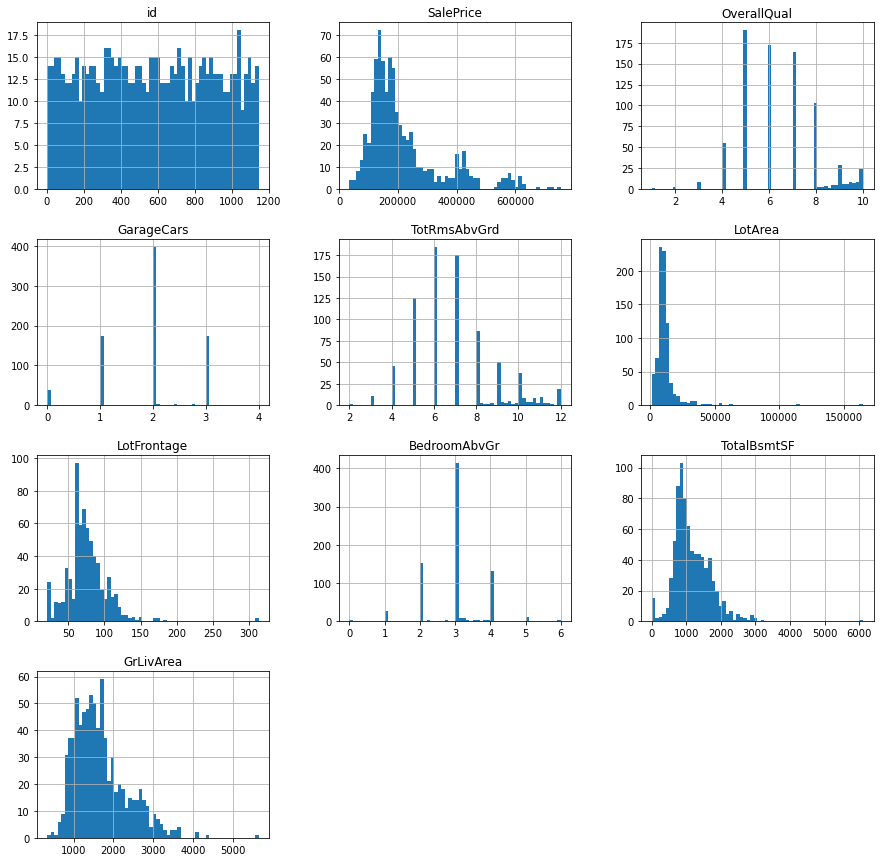

In [12]:
train.hist(bins=60, figsize=(15,15), histtype='bar')

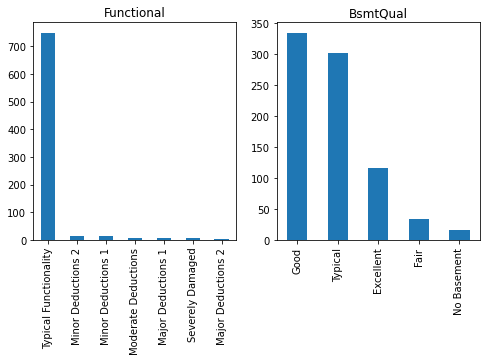

In [13]:
categorical_features = ['Functional', 'BsmtQual']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(train[categorical_features]):
    train[categorical_feature].value_counts().plot(kind='bar', figsize=(8, 4),ax=ax[i]).set_title(categorical_feature)
fig.show()


 mu = 217277.78 and sigma = 127142.67



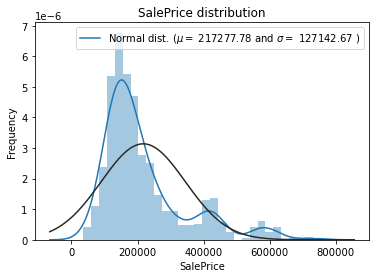

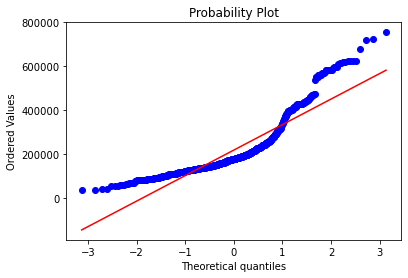

In [14]:
# target visualization
sns.distplot(train['SalePrice'], fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [20]:
# # Target transformation
# #We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# y_train = np.log1p(y_train)

# #Check the new distribution 
# sns.distplot(y_train , fit=norm);

# # Get the fitted parameters used by the function
# (mu, sigma) = norm.fit(y_train)
# print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# #Now plot the distribution
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
# plt.ylabel('Frequency')
# plt.title('SalePrice distribution')

# #Get also the QQ-plot
# fig = plt.figure()
# res = stats.probplot(y_train, plot=plt)
# plt.show()

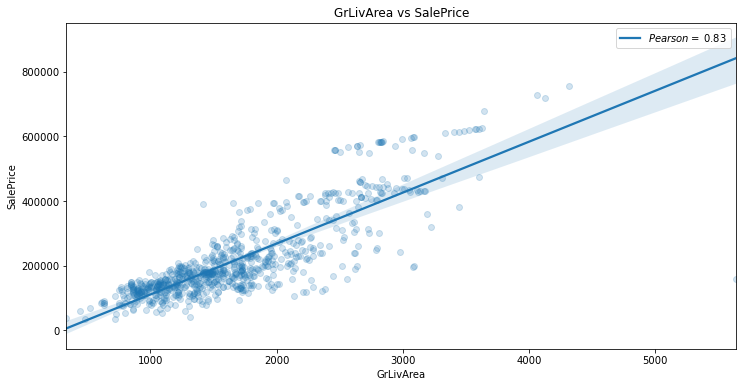

In [15]:
from scipy.stats import pearsonr
#train = pd.concat([x_train, y_train], axis=1)

corr= np.corrcoef(train['GrLivArea'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

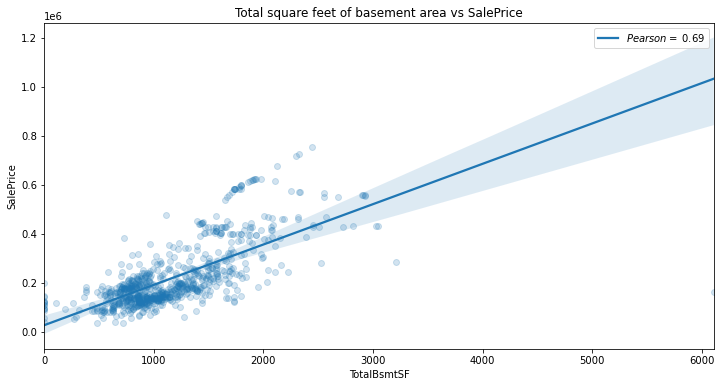

In [18]:
corr= np.corrcoef(train['TotalBsmtSF'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Total square feet of basement area vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

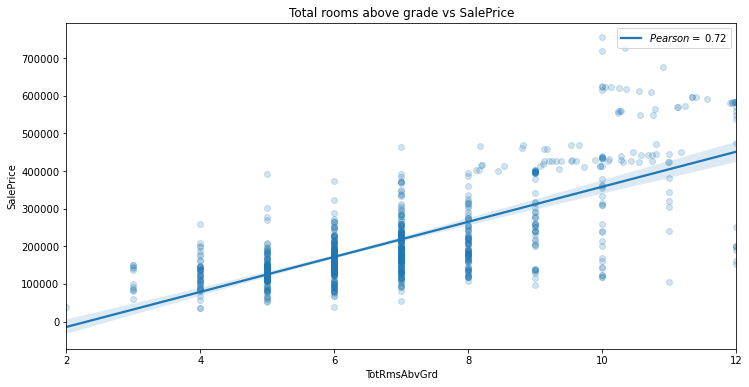

In [19]:
corr= np.corrcoef(train['TotRmsAbvGrd'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'TotRmsAbvGrd', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Total rooms above grade vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

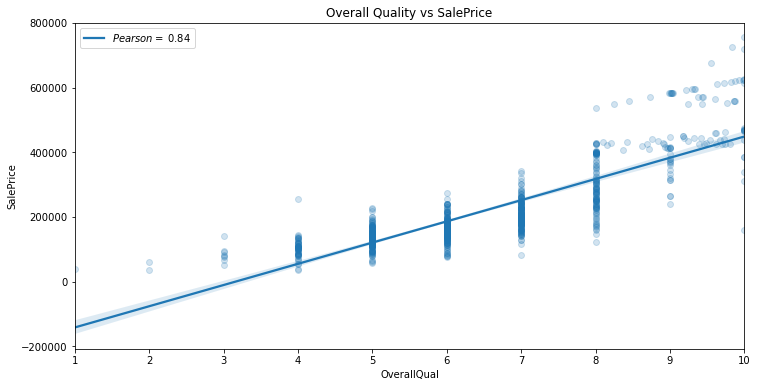

In [20]:
corr= np.corrcoef(train['OverallQual'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'OverallQual', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Overall Quality vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

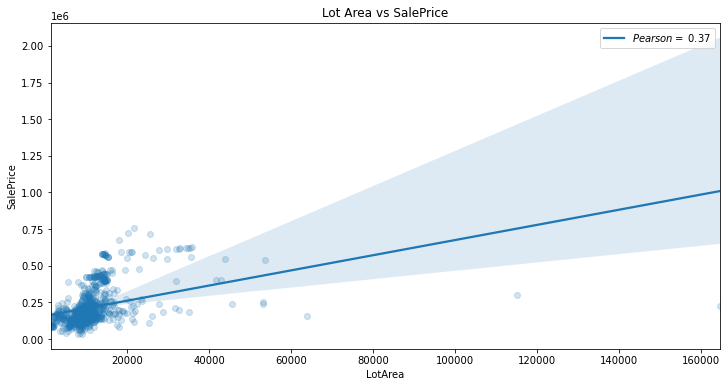

In [21]:
corr= np.corrcoef(train['LotArea'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'LotArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Lot Area vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

In [22]:
train1=train
train1.dropna(inplace = True)
corr= np.corrcoef(train1['LotFrontage'], train1['SalePrice'])[0,1]


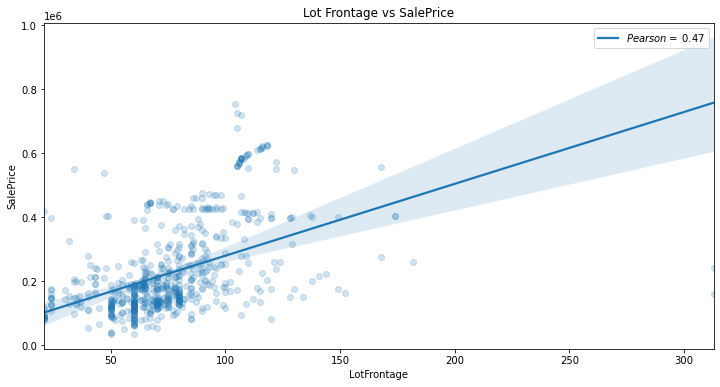

In [23]:
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'LotFrontage', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Lot Frontage vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

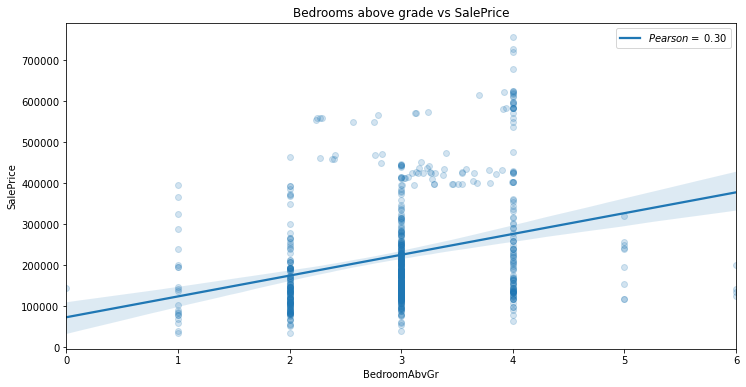

In [24]:
corr= np.corrcoef(train['BedroomAbvGr'], train['SalePrice'])[0,1]
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'BedroomAbvGr', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('Bedrooms above grade vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(corr)], loc = 'best')
plt.show()

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

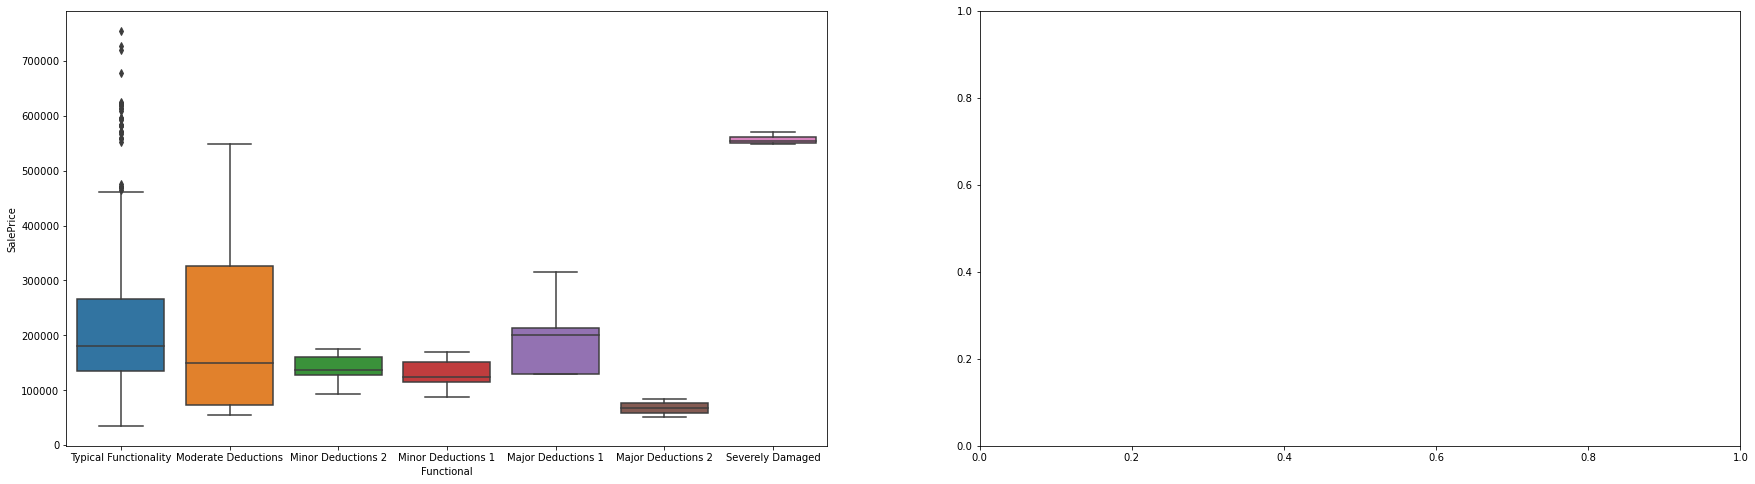

In [25]:
figure, ax = plt.subplots(1,2, figsize = (30,8))
sns.boxplot(data=train, x = 'Functional', y='SalePrice', ax = ax[0])

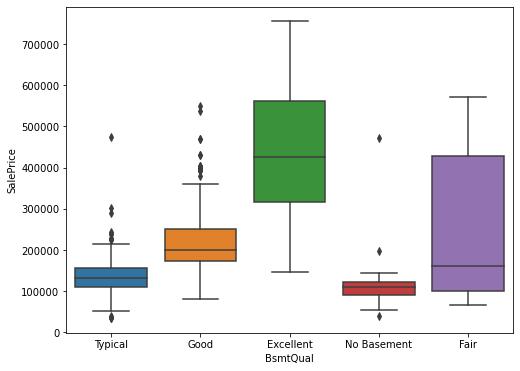

In [26]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='BsmtQual', y='SalePrice', data=train)

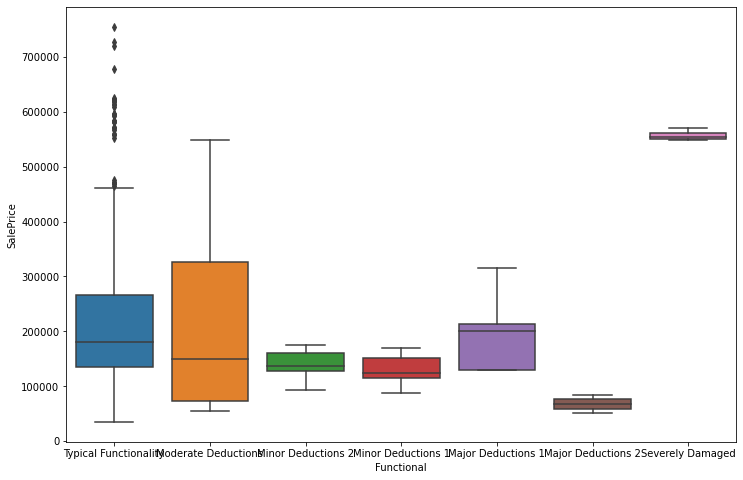

In [27]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Functional', y='SalePrice', data=train)

In [14]:
#feature engineering
train['Functional'] = train['Functional'].replace(['Minor Deductions 1'
,'Minor Deductions 2','Moderate Deductions','Major Deductions 1','Major Deductions 2','Severely Damaged','Salvage only'],'Other deductions')
test['Functional'] = test['Functional'].replace(['Minor Deductions 1'
,'Minor Deductions 2','Moderate Deductions','Major Deductions 1','Major Deductions 2','Severely Damaged','Salvage only'],'Other deductions')


<AxesSubplot:>

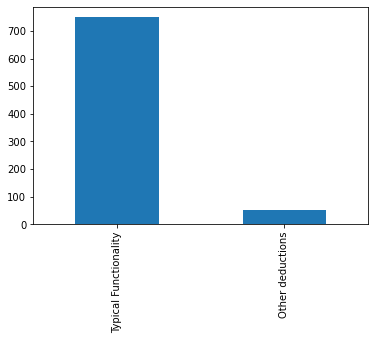

In [15]:
train['Functional'].value_counts().plot(kind='bar')

In [16]:
#OverallQual
def OverallQual_cat(OverallQual):
    if OverallQual >= 1 and OverallQual < 5:
        return "below average"
    elif OverallQual >= 5 and OverallQual < 7:
        return "average"
    else:
        return "good and above"
train['OverallQual'] = train['OverallQual'].apply(OverallQual_cat)
test['OverallQual'] = test['OverallQual'].apply(OverallQual_cat)

In [17]:
#treating anomalies
train['TotRmsAbvGrd'].round(decimals = 0)
train['BedroomAbvGr'].round(decimals = 0)

88      2.0
1014    3.0
349     2.0
988     1.0
331     2.0
       ... 
255     2.0
886     3.0
143     3.0
474     3.0
318     3.0
Name: BedroomAbvGr, Length: 800, dtype: float64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 88 to 318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            800 non-null    int64  
 1   SalePrice     800 non-null    float64
 2   OverallQual   800 non-null    object 
 3   GarageCars    800 non-null    float64
 4   TotRmsAbvGrd  800 non-null    float64
 5   LotArea       800 non-null    float64
 6   LotFrontage   666 non-null    float64
 7   BedroomAbvGr  800 non-null    float64
 8   TotalBsmtSF   800 non-null    float64
 9   BsmtQual      800 non-null    object 
 10  GrLivArea     800 non-null    float64
 11  Functional    800 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 81.2+ KB


<AxesSubplot:>

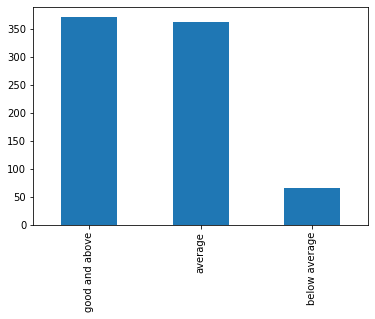

In [18]:
train['OverallQual'].value_counts().plot(kind='bar')

In [19]:
#building random forest regression to fill in missing values
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
train1=train.drop('SalePrice',1) 
train1 = train1.select_dtypes(include=['float64'])
test_lf = train1[train1['LotFrontage'].isnull()]
train1.dropna(inplace = True)
y_train_lf =train1['LotFrontage']
x_train_lf=train1.drop('LotFrontage', axis =1)
x_test_lf= test_lf.drop('LotFrontage', axis =1)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tune_sklearn import TuneGridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

model = RandomForestRegressor(random_state=2022)

parameters = {'n_estimators': [30, 50, 100, 150, 200], 'max_depth': [None]
              }

grid = make_pipeline(RobustScaler(),TuneGridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1,refit=True))
grid.fit(x_train_lf, y_train_lf)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('tunegridsearchcv',
                 TuneGridSearchCV(cv=10,
                                  estimator=RandomForestRegressor(random_state=2022),
                                  mode='max', n_jobs=-1,
                                  param_grid={'max_depth': [None],
                                              'n_estimators': [30, 50, 100, 150,
                                                               200]},
                                  sk_n_jobs=1))])

In [21]:
lf_pred = grid.predict(x_test_lf)
train.loc[train.LotFrontage.isnull(),'LotFrontage']=lf_pred 

In [22]:
#repeat for testing set
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
test1=test.drop('SalePrice',1) 
test1 = test1.select_dtypes(include=['float64'])
test_lf = test1[test1['LotFrontage'].isnull()]
test1.dropna(inplace = True)
y_train_lf =test1['LotFrontage']
x_train_lf=test1.drop('LotFrontage', axis =1)
x_test_lf= test_lf.drop('LotFrontage', axis =1)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tune_sklearn import TuneGridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

model = RandomForestRegressor(random_state=2022)

parameters = {'n_estimators': [30, 50, 100, 150, 200], 'max_depth': [None]
              }

grid = make_pipeline(RobustScaler(),TuneGridSearchCV(estimator=model, param_grid = parameters, cv = 10, n_jobs=-1,refit=True))
grid.fit(x_train_lf, y_train_lf)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('tunegridsearchcv',
                 TuneGridSearchCV(cv=10,
                                  estimator=RandomForestRegressor(random_state=2022),
                                  mode='max', n_jobs=-1,
                                  param_grid={'max_depth': [None],
                                              'n_estimators': [30, 50, 100, 150,
                                                               200]},
                                  sk_n_jobs=1))])

In [24]:
lf_pred = grid.predict(x_test_lf)
test.loc[test.LotFrontage.isnull(),'LotFrontage']=lf_pred 

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 859 to 276
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            344 non-null    int64  
 1   SalePrice     344 non-null    float64
 2   OverallQual   344 non-null    object 
 3   GarageCars    344 non-null    float64
 4   TotRmsAbvGrd  344 non-null    float64
 5   LotArea       344 non-null    float64
 6   LotFrontage   344 non-null    float64
 7   BedroomAbvGr  344 non-null    float64
 8   TotalBsmtSF   344 non-null    float64
 9   BsmtQual      344 non-null    object 
 10  GrLivArea     344 non-null    float64
 11  Functional    344 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 34.9+ KB


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 88 to 318
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            800 non-null    int64  
 1   SalePrice     800 non-null    float64
 2   OverallQual   800 non-null    object 
 3   GarageCars    800 non-null    float64
 4   TotRmsAbvGrd  800 non-null    float64
 5   LotArea       800 non-null    float64
 6   LotFrontage   800 non-null    float64
 7   BedroomAbvGr  800 non-null    float64
 8   TotalBsmtSF   800 non-null    float64
 9   BsmtQual      800 non-null    object 
 10  GrLivArea     800 non-null    float64
 11  Functional    800 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 81.2+ KB


In [25]:
#Encoding Dummy Variables
# import the onehotencoder class to implement encoding
from sklearn.preprocessing import OneHotEncoder


# set aside the categorical columns as a list object 
catcols = train.select_dtypes(['object']).columns.tolist()

# define the get dummies function to return encoded train and test sets
def get_dummies(train, test, old_col_name):
    """Given a trainset, a testset, and the name of a column holding a 
    categorical variable, fit an encoder on the trainset, and use the 
    encoder to add dummy columns into the trainset and testset
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    # the old_col_name will be taken from the categorical columns list defined previously
    cat_vals = train[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        train[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = test[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the testset dataframe
        test[new_col_name] = transformed[:,i]
    
    return train, test


for col_name in catcols:
    train, test = get_dummies(train, test, col_name)

# check if the dummies are produced correctly in the trainset
train.head()


,id,SalePrice,OverallQual,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,BsmtQual,GrLivArea,Functional,below average,good and above,Fair,Good,No Basement,Typical,Typical Functionality
88,89,84500.0,average,0.0,5.000000,6780.00000,60.0,2.000000,520.0000,Typical,754.000000,Typical Functionality,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1014,1015,470014.1,good and above,3.0,9.653694,16175.04172,95.0,2.826847,2002.1157,Good,3036.087937,Typical Functionality,0.0,1.0,0.0,1.0,0.0,0.0,1.0
349,350,140000.0,average,2.0,6.000000,9170.00000,70.0,2.000000,1214.0000,Typical,1214.000000,Typical Functionality,0.0,0.0,0.0,0.0,0.0,1.0,1.0
988,989,136500.0,average,2.0,3.000000,4435.00000,37.0,1.000000,848.0000,Good,848.000000,Typical Functionality,0.0,0.0,0.0,1.0,0.0,0.0,1.0
331,332,374000.0,good and above,3.0,6.000000,11846.00000,72.0,2.000000,1792.0000,Excellent,1792.000000,Typical Functionality,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# with our dummy variables in place, we no longer need old columns
def dropfunc(data, column_list):
    for column in data:
        if column in column_list:
            del data[column]

# implement the above function on the categorical columns list previously defined
dropfunc(train, catcols)
dropfunc(test, catcols)

train.head()

,id,SalePrice,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,GrLivArea,below average,good and above,Fair,Good,No Basement,Typical,Typical Functionality
88,89,84500.0,0.0,5.000000,6780.00000,60.0,2.000000,520.0000,754.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1014,1015,470014.1,3.0,9.653694,16175.04172,95.0,2.826847,2002.1157,3036.087937,0.0,1.0,0.0,1.0,0.0,0.0,1.0
349,350,140000.0,2.0,6.000000,9170.00000,70.0,2.000000,1214.0000,1214.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0
988,989,136500.0,2.0,3.000000,4435.00000,37.0,1.000000,848.0000,848.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
331,332,374000.0,3.0,6.000000,11846.00000,72.0,2.000000,1792.0000,1792.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 88 to 318
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     800 non-null    int64  
 1   SalePrice              800 non-null    float64
 2   GarageCars             800 non-null    float64
 3   TotRmsAbvGrd           800 non-null    float64
 4   LotArea                800 non-null    float64
 5   LotFrontage            800 non-null    float64
 6   BedroomAbvGr           800 non-null    float64
 7   TotalBsmtSF            800 non-null    float64
 8   GrLivArea              800 non-null    float64
 9   below average          800 non-null    float64
 10  good and above         800 non-null    float64
 11  Fair                   800 non-null    float64
 12  Good                   800 non-null    float64
 13  No Basement            800 non-null    float64
 14  Typical                800 non-null    float64
 15  Typic

In [28]:
test_copy=test.copy()
test_ID = test['id']
train_ID = train['id']

In [26]:
test_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 859 to 276
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     344 non-null    int64  
 1   SalePrice              344 non-null    float64
 2   GarageCars             344 non-null    float64
 3   TotRmsAbvGrd           344 non-null    float64
 4   LotArea                344 non-null    float64
 5   LotFrontage            344 non-null    float64
 6   BedroomAbvGr           344 non-null    float64
 7   TotalBsmtSF            344 non-null    float64
 8   GrLivArea              344 non-null    float64
 9   below average          344 non-null    float64
 10  good and above         344 non-null    float64
 11  Fair                   344 non-null    float64
 12  Good                   344 non-null    float64
 13  No Basement            344 non-null    float64
 14  Typical                344 non-null    float64
 15  Typi

In [29]:
train = train.drop('id', 1)
test= test.drop('id', 1)

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 88 to 318
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SalePrice              800 non-null    float64
 1   GarageCars             800 non-null    float64
 2   TotRmsAbvGrd           800 non-null    float64
 3   LotArea                800 non-null    float64
 4   LotFrontage            800 non-null    float64
 5   BedroomAbvGr           800 non-null    float64
 6   TotalBsmtSF            800 non-null    float64
 7   GrLivArea              800 non-null    float64
 8   below average          800 non-null    float64
 9   good and above         800 non-null    float64
 10  Fair                   800 non-null    float64
 11  Good                   800 non-null    float64
 12  No Basement            800 non-null    float64
 13  Typical                800 non-null    float64
 14  Typical Functionality  800 non-null    float64
dtypes: fl

In [31]:
#Detecting anomalies

from sklearn.ensemble import IsolationForest

# fit the trainset into the model
iso_model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(.010),max_features=1.0)
iso_model.fit(train)

#create two additional columns to check the score 
train['anomaly']=iso_model.predict(train)
train['scores']=iso_model.decision_function(train)

#print anomaly
print("Percentage of anomalies in trainset: {:.2f}".format((len(train.loc[train['anomaly']==-1])/len(train))*100))

Percentage of anomalies in trainset: 1.00


In [32]:
#change the values in the 'anomaly'column:
#normal observation =0
# anomaly = 1
train.loc[train['anomaly'] == 1,'anomaly'] = 0
train.loc[train['anomaly'] == -1,'anomaly'] = 1
train['anomaly'].value_counts()

0    792
1      8
Name: anomaly, dtype: int64

In [33]:
#delete scores column on trainset
train = train.drop('scores', 1)

In [35]:
#repeat the same steps with testset
iso_model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(.010),max_features=1.0)
iso_model.fit(test)

test['anomaly']=iso_model.predict(test)
test['scores']=iso_model.decision_function(test)

#delete scores column on trainset
del test['scores']

#change the values in the 'anomaly'column:
#normal observation =0
# anomaly = 1
test.loc[test['anomaly'] == 1,'anomaly'] = 0
test.loc[test['anomaly'] == -1,'anomaly'] = 1
test['anomaly'].value_counts()


0    340
1      4
Name: anomaly, dtype: int64

In [36]:
train['id']= train_ID
test['id'] = test_ID

In [37]:
#feature scaling
# import the standard scaler class and instantiate the object
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# seperate into predictor and target sets, we do not scale our target
train_target = train['SalePrice'].values
train_ID = train['id'].values
# we do not include and scale date + accident index as part of modelling going forward
train_predictors = train.drop(columns=['SalePrice','id'], axis=1)

# call the fit and transform method on our predictors
scaled_vals = scaler.fit_transform(train_predictors)

# put the scaled values back into the trainset dataframe
train = pd.DataFrame(scaled_vals, columns=train_predictors.columns)

# put the non-scaled target back in
train['SalePrice'] = train_target
train['id'] = train_ID
# inspect the data
train.head()

,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,GrLivArea,below average,good and above,Fair,Good,No Basement,Typical,Typical Functionality,anomaly,SalePrice,id
0,-2.408254,-1.000397,-0.499265,-0.562768,-1.173243,-1.196816,-1.376213,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,84500.0,89
1,1.363704,1.359176,0.523117,0.727622,-0.157973,1.567248,2.036275,-0.299864,1.075330,-0.210681,1.181190,-0.142857,-0.776664,0.260942,-0.100504,470014.1,1015
2,0.106385,-0.493364,-0.239182,-0.194085,-1.173243,0.097456,-0.688358,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,140000.0,350
3,0.106385,-2.014461,-0.754451,-1.410738,-2.401125,-0.585114,-1.235651,-0.299864,-0.929947,-0.210681,1.181190,-0.142857,-0.776664,0.260942,-0.100504,136500.0,989
4,1.363704,-0.493364,0.052025,-0.120348,-1.173243,1.175394,0.175946,-0.299864,1.075330,-0.210681,-0.846604,-0.142857,-0.776664,0.260942,-0.100504,374000.0,332


In [38]:
# we repeat much of the scaling steps for the test set as well
# the only difference here is that we do not call the fit transform, but only fit

test_target = test["SalePrice"].values
test_ID = test['id'].values
test_predictors = test.drop(columns=["SalePrice",'id'], axis=1)

scaled_vals = scaler.transform(test_predictors)
test = pd.DataFrame(scaled_vals, columns=test_predictors.columns)

# put the non-scaled variables back in
test['SalePrice'] = test_target
test['id'] = test_ID


 
test.head()

,GarageCars,TotRmsAbvGrd,LotArea,LotFrontage,BedroomAbvGr,TotalBsmtSF,GrLivArea,below average,good and above,Fair,Good,No Basement,Typical,Typical Functionality,anomaly,SalePrice,id
0,0.106385,-1.000397,-0.271610,-0.120348,-1.173243,-0.465758,-1.139950,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,147000.0,860
1,0.106385,-1.000397,-0.262034,-0.710241,-1.173243,-0.286723,-0.966491,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,115000.0,281
2,0.106385,-1.000397,1.514585,0.690754,0.054639,-0.182286,-0.948547,3.334848,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,132250.0,618
3,-1.150935,0.013668,-0.285866,-0.857714,0.054639,-0.795853,-0.280132,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,113000.0,164
4,-1.150935,0.013668,-0.071814,-0.199984,-1.173243,0.849029,0.288096,-0.299864,-0.929947,-0.210681,-0.846604,-0.142857,1.287559,0.260942,-0.100504,190000.0,114


In [39]:
test_ID = test['id'] 
train = train.drop('id', 1)
test = test.drop('id', 1)

In [45]:
test.to_csv('test.csv',index=False)
train.to_csv('train.csv',index=False)

In [40]:
# drop labels for training set, but keep all others
Xtrain = train.drop("SalePrice", axis=1)
Xtest = test.drop("SalePrice", axis=1)


ytrain = train["SalePrice"].copy()
ytest = test["SalePrice"].copy()

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(Xtrain, ytrain)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(Xtrain.columns, importance)
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    print(feature)

('GarageCars', 0.6255195681783668)
('TotRmsAbvGrd', 0.1258148715792589)
('good and above', 0.05457871186674949)
('TotalBsmtSF', 0.05351796113925348)
('LotFrontage', 0.04822483118642195)
('GrLivArea', 0.03370130021522779)
('id', 0.02734042767151224)
('LotArea', 0.008951947569198248)
('BedroomAbvGr', 0.007360224332612945)
('Typical', 0.00687653136369977)
('Typical Functionality', 0.003928558707527113)
('Good', 0.002561512709334229)
('below average', 0.0015600917153685652)
('Fair', 6.035651632020798e-05)
('No Basement', 2.4900362904805794e-06)
('anomaly', 6.152128577482305e-07)


In [41]:
#baseline
mean_rating = ytrain.mean()
mean_rating

217277.77864349997

In [42]:
from sklearn.metrics import mean_absolute_error
# each row of yhat will contain the mean rating
yhat = np.full((ytest.shape[0], 1), mean_rating)
baseline_mae = mean_absolute_error(ytest, yhat)
baseline_mae

91936.81960331976

In [ ]:
#yhat = pd.DataFrame(yhat)

In [ ]:
#yhat.drop(yhat.index[345:800],0,inplace=True)

In [43]:
from sklearn import neighbors
model = neighbors.KNeighborsRegressor(n_neighbors = 2)
model.fit(Xtrain, ytrain)  #fit the model
pred=model.predict(Xtest) #make prediction on test set
error = mean_absolute_error(ytest,pred) 
error

19561.27232005814

In [44]:
ytest = pd.DataFrame(ytest)
pred =pd.DataFrame(pred)
result = pd.concat([test_ID,pred], axis=1)
result.to_csv('result.csv',index=False)

In [45]:
result = result.merge(test_copy,on='id', how='inner')
result.to_csv('result.csv',index=False)

In [ ]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['Predicted'] = pred
sub = test_copy.merge(sub,on='id', how='inner')
sub.to_csv('result.csv',index=False)